###  Python Basics Tutorial

#### Compare Machine Learning Algorithms

####  Machine Learning Mastery with Python
####  Jason Brownlee

- In this recipe, 6 algo's used
    - Logistic regression
    - LDA
    - KNN
    - CART
    - Naive Bayes
    - SVM

In [15]:
## Load packages for reading, plotting and performing
##    each algo

from pandas import read_csv
from matplotlib import pyplot

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [16]:
## Read file and designate depen and indepen vars

path = 'D:\OneDrive - QJA\My Files\DataScience\DataSets'
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 
         'mass', 'pedi', 'age', 'class']

df = read_csv(path + '\\' + filename, names = names)
array = df.values
X = array[:, 0:8]
Y = array[:, 8]

In [37]:
## Prepare each model

## create empty list to hold models
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'auto')))

results = []  # empty list to store results
names = [] # empty list to stor model name

scoring = 'accuracy'
n_splits = 10  # for kfold splits
seed = 7  # set random seed 

for name, model in models:
    kfold = KFold(n_splits = n_splits, random_state = seed)
    cv_results = cross_val_score(model, X, Y,
                                 cv = kfold,
                                 scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %.3f (Stnd Dev: %.3f)' % (name,
                           cv_results.mean(),
                           cv_results.std())
    print(msg)

LR: 0.770 (Stnd Dev: 0.048)
LDA: 0.773 (Stnd Dev: 0.052)
KNN: 0.727 (Stnd Dev: 0.062)
CART: 0.699 (Stnd Dev: 0.067)
NB: 0.755 (Stnd Dev: 0.043)
SVM: 0.651 (Stnd Dev: 0.072)


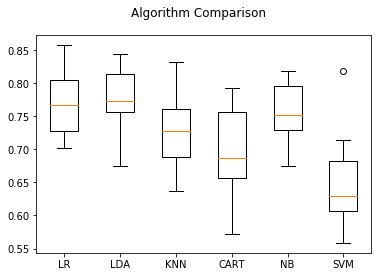

In [38]:
## Plot comparison of algos for each CV run

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## LR, LDA, and NB seem to perform relatively equaly
##    while SVM has very low mean accuracy